In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

C:\Users\vandi\anaconda3\envs\bio\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df = pd.read_csv('bioactivitydata_descCalc.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [7]:
X.shape

(2165, 881)

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2165, 130)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Compare ML Algorithms

In [19]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

 10%|▉         | 4/42 [00:00<00:04,  8.84it/s]C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4279712180778006, tolerance: 0.4098438456001638
  tol, rng, random, positive)
C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45923102974620633, tolerance: 0.4098438456001638
  tol, rng, random, positive)
C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5009116176870521, tolerance: 0.4098438456001638
  tol, rng, random, positive)
C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_m

In [14]:
# Performance table of the training set
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.67,0.70,0.94,0.05
ExtraTreeRegressor,0.67,0.70,0.94,0.05
ExtraTreesRegressor,0.67,0.70,0.94,2.17
GaussianProcessRegressor,0.67,0.70,0.94,1.02
XGBRegressor,0.64,0.67,0.98,0.42
RandomForestRegressor,0.60,0.63,1.04,1.62
BaggingRegressor,0.57,0.60,1.08,0.22
MLPRegressor,0.50,0.54,1.17,4.17
LGBMRegressor,0.44,0.49,1.23,0.23


In [20]:
# Performance of the test set
clf2 = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_test, predictions_test = clf2.fit(X_train, X_test, Y_train, Y_test)
predictions_test

 10%|▉         | 4/42 [00:00<00:04,  9.00it/s]C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4279712180778006, tolerance: 0.4098438456001638
  tol, rng, random, positive)
C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45923102974620633, tolerance: 0.4098438456001638
  tol, rng, random, positive)
C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5009116176870521, tolerance: 0.4098438456001638
  tol, rng, random, positive)
C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\sklearn\linear_m

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,-0.31,0.09,1.59,0.50
GradientBoostingRegressor,-0.31,0.08,1.59,0.66
PoissonRegressor,-0.33,0.07,1.60,0.05
RidgeCV,-0.33,0.07,1.60,0.08
BayesianRidge,-0.34,0.07,1.60,0.08
Ridge,-0.34,0.06,1.61,0.03
SVR,-0.35,0.06,1.61,0.64
TweedieRegressor,-0.35,0.06,1.61,0.03
GeneralizedLinearRegressor,-0.35,0.06,1.61,0.03


[(0.0, 1.0)]

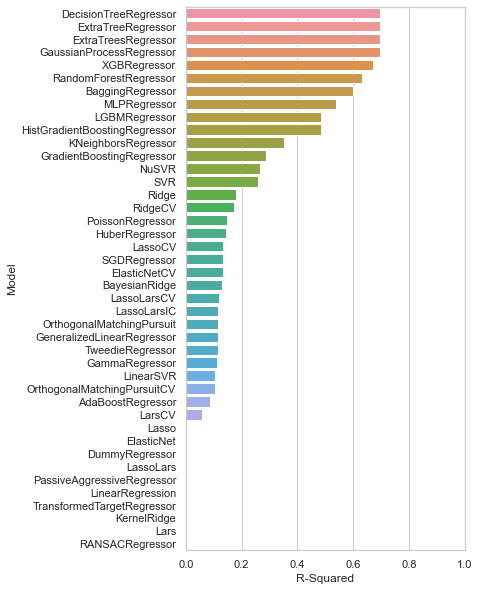

In [21]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

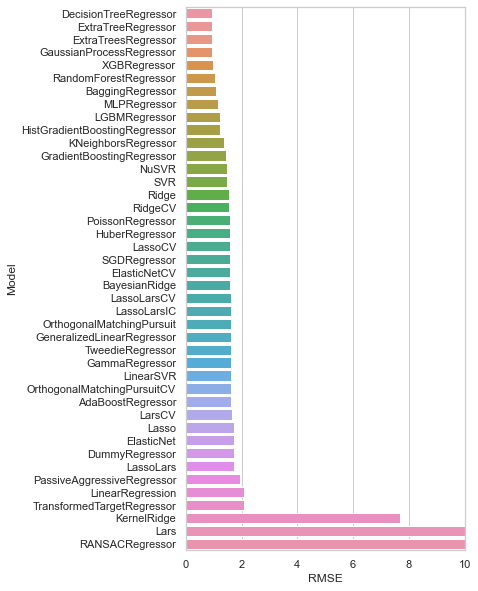

In [22]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

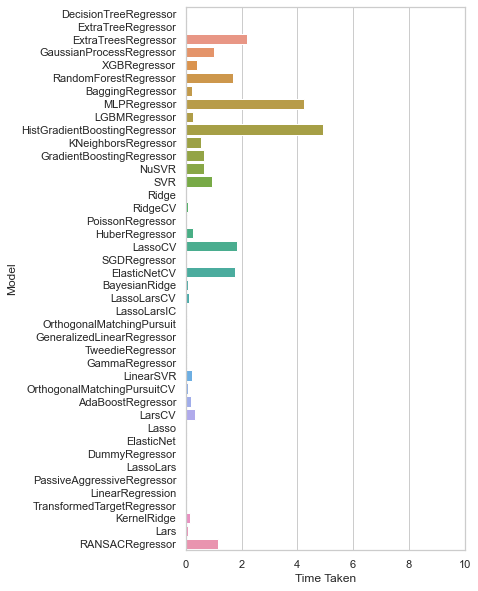

In [23]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))